Roll No        0
NationalITy    0
WT             0
DSBDA          0
AI             0
Average        0
Grade          0
PG             0
dtype: int64
Roll No -> Q1: 5.25, Q3: 11.75
WT -> Q1: 56.25, Q3: 75.0
DSBDA -> Q1: 62.0, Q3: 83.25
AI -> Q1: 46.25, Q3: 74.75
Average -> Q1: 56.417500000000004, Q3: 75.7525
The Maximum Marks for AI are - 90.0
The Average marks of AI are -  66.5


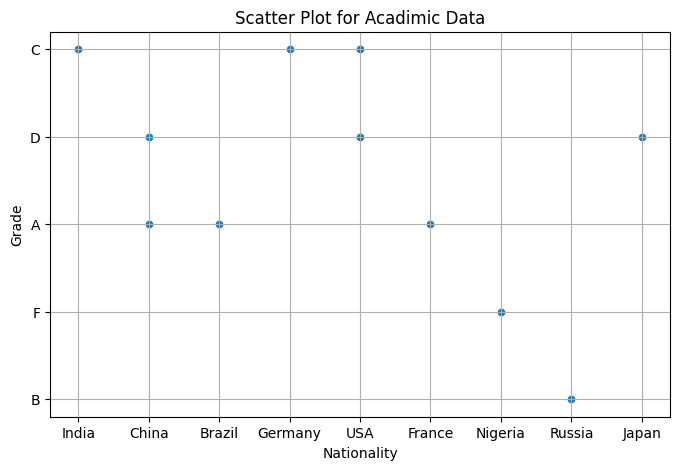

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'/content/dsbda_03.csv')

df.shape


df['WT'] = df['WT'].fillna(df['WT'].median())
df['DSBDA'] = df['DSBDA'].fillna(df['DSBDA'].median())


df=df.fillna(0)

missing = df.isnull().sum()
print(missing)

num_cols = df.select_dtypes(include=np.number).columns

for cols in num_cols:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  IQR= Q3-Q1
  print(f"{cols} -> Q1: {Q1}, Q3: {Q3}")
  df = df[(df[cols] >= Q1 -1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)]

max_ai = df['AI'].max()
print("The Maximum Marks for AI are -",max_ai)

avg_ai = df['AI'].mean()
print('The Average marks of AI are - ',avg_ai)

plt.figure(figsize=(8,5))
sns.scatterplot(x='NationalITy',y='Grade',data=df)
plt.title("Scatter Plot for Acadimic Data")
plt.xlabel('Nationality')
plt.ylabel('Grade')
plt.grid(True)
plt.show()